# Linear and Multiple Linear Regression

In this lab you will practice performing linear and multiple regression. To begin, import the following libraries:

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Then, we'll import the dataset: 

In [2]:
# Reading the dataset
df = pd.read_parquet('final_dataset.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 4881 non-null   datetime64[ns]
 1   precip               4881 non-null   float64       
 2   max_temp             4881 non-null   int64         
 3   min_temp             4881 non-null   int64         
 4   gwl                  4881 non-null   float64       
 5   daily_discharge_cfs  4881 non-null   float64       
 6   sm_pca               4718 non-null   float64       
 7   st_pca               4718 non-null   float64       
 8   target               4881 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 343.3 KB


In this part, you will generate a boxplot and remove outliers using IQR method. To begin, replace NaN values with 0 and filter the dataset to use `date`, `max_temp`, and `sm_pca`. After cleaning and filtering your dataset, generate the boxplot and remove outliers using IQR.

In [4]:
df.fillna(0, inplace=True)

In [5]:
df.isnull().sum()

date                   0
precip                 0
max_temp               0
min_temp               0
gwl                    0
daily_discharge_cfs    0
sm_pca                 0
st_pca                 0
target                 0
dtype: int64

In [6]:
df_filtered = df[['date', 'max_temp', 'sm_pca']]

In [7]:
print("Initial shape of df_filtered:", df_filtered.shape)  

Initial shape of df_filtered: (4881, 3)


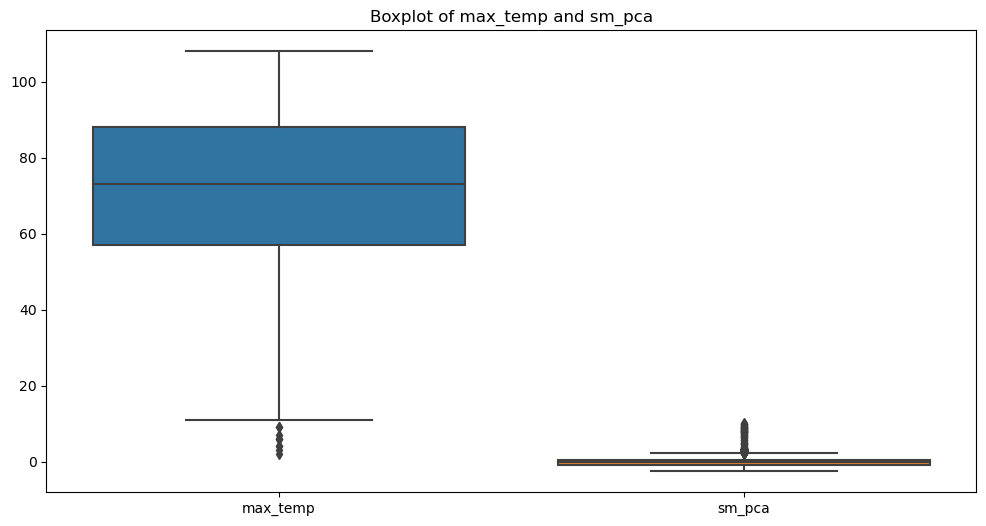

In [8]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered[['max_temp', 'sm_pca']])
plt.title("Boxplot of max_temp and sm_pca")
plt.show()

In [9]:
# Calculate IQR for max_temp and sm_pca
Q1 = df_filtered[['max_temp', 'sm_pca']].quantile(0.25)
Q3 = df_filtered[['max_temp', 'sm_pca']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_max_temp = ((df_filtered['max_temp'] < lower_bound['max_temp']) | 
                      (df_filtered['max_temp'] > upper_bound['max_temp'])).sum()

outliers_sm_pca = ((df_filtered['sm_pca'] < lower_bound['sm_pca']) | 
                    (df_filtered['sm_pca'] > upper_bound['sm_pca'])).sum()

total_outliers = ((df_filtered[['max_temp', 'sm_pca']] < lower_bound) | 
                  (df_filtered[['max_temp', 'sm_pca']] > upper_bound)).any(axis=1).sum()

print(f"Outliers detected in max_temp: {outliers_max_temp}")
print(f"Outliers detected in sm_pca: {outliers_sm_pca}")
print(f"Total outliers detected: {total_outliers}")
print(f"Expected to remove: {4881 - 4632} rows")


Outliers detected in max_temp: 10
Outliers detected in sm_pca: 242
Total outliers detected: 252
Expected to remove: 249 rows


In [10]:
# Adjusting the threshold slightly
IQR_THRESHOLD = 1.505  # Slightly higher than 1.5

# Compute adjusted IQR bounds
lower_bound = Q1 - IQR_THRESHOLD * IQR
upper_bound = Q3 + IQR_THRESHOLD * IQR

# Apply the adjusted outlier filtering
df_cleaned = df_filtered[~((df_filtered[['max_temp', 'sm_pca']] < lower_bound) | 
                           (df_filtered[['max_temp', 'sm_pca']] > upper_bound)).any(axis=1)]

# Check final shape
print("Final shape after outlier removal:", df_cleaned.shape)


Final shape after outlier removal: (4632, 3)


In [11]:
df_cleaned.head()

,date,max_temp,sm_pca
13,2010-02-27,50,2.043029
14,2010-02-28,44,1.830903
15,2010-03-01,43,1.610450
16,2010-03-02,55,1.488830
17,2010-03-03,61,1.377398


In [12]:
df = df_cleaned.copy()

In [13]:
df.shape

(4632, 3)

In [14]:
df['max_temp'].mean()

72.17314335060449

In [15]:
df['sm_pca'].mean()

-0.2587221589069467

In [16]:
df['max_temp'].min()

11

In [17]:
df['sm_pca'].max()

2.2336295144114002

In [18]:
assert (df.shape == (4632, 3), "Check that your dataframe is filtered correctly.")
assert (np.isclose(df['max_temp'].mean(), 72.173143)), "Check that you have removed outliers correctly for max_temp."
assert (np.isclose(df['sm_pca'].mean(), -0.258722)), "Check that you have removed outliers correctly for sm_pca."
assert (np.isclose(df['max_temp'].min(), 11.000000)), "Check that you have removed outliers correctly for max_temp."
assert (np.isclose(df['sm_pca'].max(), 2.233630)), "Check that you have removed outliers correctly for sm_pca."

Next, we'll split the data into training and testing sets before performing a linear regression using `LinearRegression()` and fitting the training data. Remember to reshape your data. 

After performing the linear regression, you should generate a graph similar to the following: 

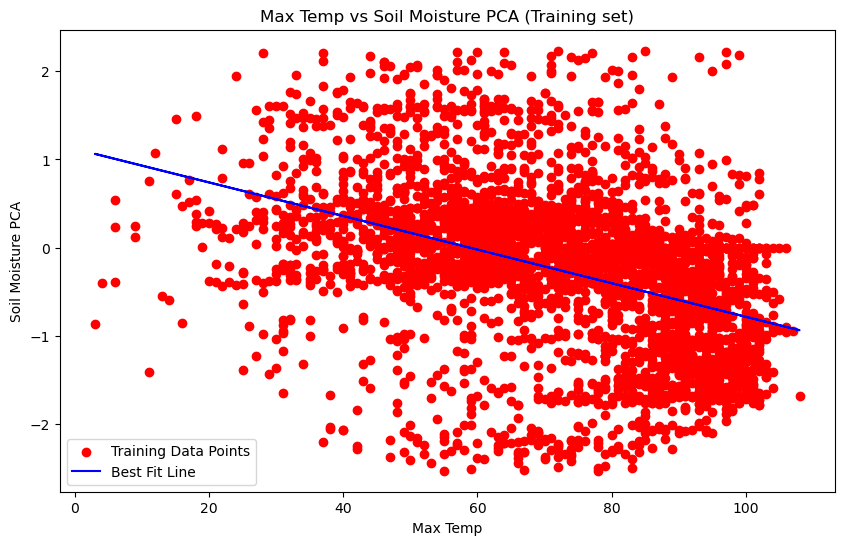


In [19]:
X = df[['max_temp']]  # Feature (2D array)
y = df['sm_pca']  # Target (1D array)

In [ ]:
# Splitting data into training and test set using sklearn
X_train, X_test, y_train, y_test = train_test_split(df['max_temp'], df['sm_pca'], test_size=0.25, random_state=0)

# Looking at training data and test data

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Display sample data
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,max_temp
2803,66
1495,78
1973,98
1159,60
3771,98


2803    1.192699
1495    0.408074
1973   -0.500562
1159   -0.393938
3771   -1.645886
Name: sm_pca, dtype: float64

,max_temp
394,71
593,68
1873,67
3975,44
3333,83


394    -0.289785
593    -0.749500
1873    0.309108
3975    0.020986
3333   -1.529026
Name: sm_pca, dtype: float64

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3474, 1), (3474,), (1158, 1), (1158,))

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

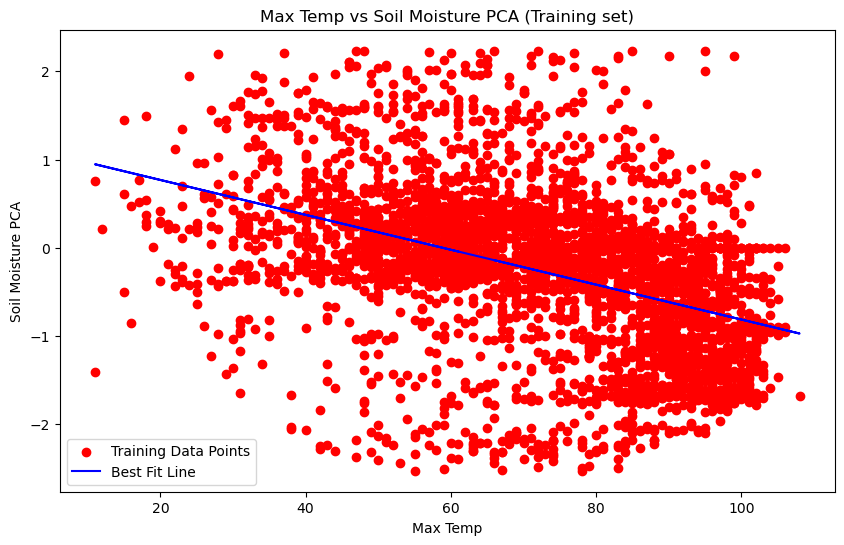

In [23]:
# Visualizing the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red')

# Plotting the best fit line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Max Temp vs Soil Moisture PCA (Training set)')
plt.xlabel('Max Temp')
plt.ylabel('Soil Moisture PCA')
plt.legend(['Training Data Points', 'Best Fit Line'])
plt.show()

Finally, you will calculate the mean squared error (MSE) and the R2 score for both the training and test data. 

In [24]:
# Predictions on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Training Data Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test Data Metrics
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f'Mean Squared Error for Training data: {mse_train}')
print(f'R2 Score for Training data: {r2_train}')
print(f'Mean Squared Error for Test data: {mse_test}')
print(f'R2 Score for Test data: {r2_test}')

Mean Squared Error for Training data: 0.7083519834616381
R2 Score for Training data: 0.17656709200883003
Mean Squared Error for Test data: 0.8355896065171731
R2 Score for Test data: 0.1283955991150405
